
# Importing libraries




In [286]:
import pandas as pd
import numpy as np

# Libaries for plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries for statistical testing
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu

# Libraries for machine learning
from pandas.core.reshape.encoding import get_dummies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import scale
from statsmodels.othermod.betareg import BetaModel

# Libraries for machine learning model evaluation
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error



In [287]:
# Nice to have for data exploration
pd.set_option('display.max_columns', None)


# Importing data

In [288]:
# Mount to google drive for importing data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [289]:
# import data from drive
df=pd.read_csv('drive/MyDrive/alpine_data/cs_data_40k.csv')


# Checking data

### Overall data impression

In [290]:
df.head(10)

,client_id,gender,health_score,race_ethnicity,hepatitis_c_antibody_confirmed,fasting_glucose_mgdl,albumin_gdl,blood_urea_nitrogen_mgdl,total_calcium_mgdl,bicarbonate_mmoll,creatinine_mgdl,glucose_serum_mgdl,phosphorus_mgdl,total_protein_gdl,sodium_mmoll,potassium_mmoll,chloride_mmoll,pulse_regular_or_irregular,mil_maximum_inflation_levels_mm_hg,systolic__blood_pres_1st_rdg_mm_hg,diastolic__blood_pres_1st_rdg_mm_hg,weight_kg,standing_height_cm,waist_circumference_cm
0,5001.0,2,9.1,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,150.0,120.0,56.0,41.6,128.5,78.1
1,5002.0,1,3.4,1.0,2.0,NaN,4.2,9.0,8.9,24.0,0.6,94.0,3.8,7.3,137.7,3.62,98.8,2.0,180.0,132.0,88.0,66.7,158.7,97.7
2,5003.0,1,8.7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,140.0,NaN,NaN,40.5,161.3,68.5
3,5004.0,2,9.1,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,120.0,80.0,52.0,27.8,127.3,56.8
4,5005.0,2,9.4,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,25.9,130.9,53.4
5,5006.0,2,5.1,1.0,2.0,NaN,5.3,12.0,9.4,28.0,0.5,80.0,3.8,8.3,144.9,3.71,103.8,1.0,150.0,116.0,72.0,80.5,156.9,98.5
6,5007.0,1,9.8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,14.0,96.9,48.5
7,5008.0,2,6.6,3.0,2.0,NaN,4.4,15.0,9.0,25.0,0.5,83.0,2.9,7.8,138.5,3.76,99.3,1.0,130.0,98.0,70.0,68.6,159.9,84.6
8,5009.0,1,4.3,3.0,2.0,137.0,4.3,22.0,9.3,23.0,0.8,126.0,3.6,6.9,140.7,4.33,103.9,1.0,180.0,136.0,72.0,83.9,185.6,102.2
9,5010.0,1,9.9,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,12.3,NaN,NaN


In [291]:
df.shape

(40001, 24)

In [292]:
df.dtypes

client_id                              float64
gender                                   int64
health_score                           float64
race_ethnicity                         float64
hepatitis_c_antibody_confirmed         float64
fasting_glucose_mgdl                   float64
albumin_gdl                            float64
blood_urea_nitrogen_mgdl               float64
total_calcium_mgdl                     float64
bicarbonate_mmoll                      float64
creatinine_mgdl                        float64
glucose_serum_mgdl                     float64
phosphorus_mgdl                        float64
total_protein_gdl                      float64
sodium_mmoll                           float64
potassium_mmoll                        float64
chloride_mmoll                         float64
pulse_regular_or_irregular             float64
mil_maximum_inflation_levels_mm_hg     float64
systolic__blood_pres_1st_rdg_mm_hg     float64
diastolic__blood_pres_1st_rdg_mm_hg    float64
weight_kg    

From the column names, we can see that the columns contain demographic information, and blood measurements. We can already see many missing values.

In [293]:
df.describe()

,client_id,gender,health_score,race_ethnicity,hepatitis_c_antibody_confirmed,fasting_glucose_mgdl,albumin_gdl,blood_urea_nitrogen_mgdl,total_calcium_mgdl,bicarbonate_mmoll,creatinine_mgdl,glucose_serum_mgdl,phosphorus_mgdl,total_protein_gdl,sodium_mmoll,potassium_mmoll,chloride_mmoll,pulse_regular_or_irregular,mil_maximum_inflation_levels_mm_hg,systolic__blood_pres_1st_rdg_mm_hg,diastolic__blood_pres_1st_rdg_mm_hg,weight_kg,standing_height_cm,waist_circumference_cm
count,39999.000000,40001.000000,40000.000000,40000.000000,28863.000000,12329.000000,25143.000000,25142.000000,25142.000000,25057.000000,18253.000000,25144.000000,18250.000000,25121.000000,25141.000000,25140.000000,25135.000000,36599.000000,28660.000000,25768.000000,25768.000000,37124.000000,34315.000000,33231.000000
mean,25002.132503,2.415090,7.049395,2.758225,1.998268,101.657904,4.269745,12.412895,9.519919,24.203097,0.844056,95.316656,3.923392,7.288301,138.966783,4.011152,103.307082,1.027269,147.658758,119.916641,65.998758,60.438687,156.318984,85.317324
std,11548.295610,180.685875,2.487535,1.215466,0.214012,32.319785,0.382404,5.700410,0.392182,2.304639,0.404725,31.639410,0.660056,0.507545,2.345883,0.338379,2.779014,0.162867,21.215526,20.274881,14.761766,30.901644,23.402287,21.192316
min,5001.000000,1.000000,1.500000,1.000000,1.000000,38.000000,1.200000,1.000000,6.700000,10.000000,0.200000,30.000000,1.500000,3.400000,99.000000,2.400000,72.000000,1.000000,100.000000,72.000000,0.000000,2.400000,79.000000,32.000000
25%,15001.500000,1.000000,5.200000,1.000000,2.000000,88.500000,4.100000,9.000000,9.300000,23.000000,0.700000,83.000000,3.500000,7.000000,138.000000,3.800000,102.000000,1.000000,130.000000,106.000000,58.000000,37.100000,151.000000,70.300000
50%,25002.000000,2.000000,8.100000,3.000000,2.000000,95.000000,4.300000,12.000000,9.500000,24.000000,0.800000,89.000000,3.900000,7.300000,139.000000,4.000000,103.000000,1.000000,140.000000,116.000000,66.000000,63.600000,162.400000,85.700000
75%,35002.500000,2.000000,9.000000,4.000000,2.000000,103.200000,4.500000,15.000000,9.800000,26.000000,1.000000,97.000000,4.300000,7.600000,140.000000,4.200000,105.000000,1.000000,160.000000,128.000000,76.000000,81.000000,171.600000,100.300000
max,45004.000000,36139.000000,10.000000,5.000000,5.000000,686.200000,5.700000,122.000000,13.500000,40.000000,17.800000,707.000000,8.100000,10.900000,160.000000,6.800000,117.000000,2.000000,290.000000,270.000000,134.000000,371.000000,204.400000,175.000000


Here I spot several things.
1. There are missing values in the client_id column. client_id should be the key values, so I tend to remove the two records with missing client_id.
2. Gender, race_ethnicity, hepatitis_c_antibody_confirmed, pulse_regular_or_irregular are chategorical variables displayed as integers type.
3. Gender has a max value of 36139 which is strange, may be used to mark missing data, could be considered missing. Max value of hepatitis_c_antibody_confirmed is also unexpected, this needs to be further evaluated as we do not have the metadata for this dataset, it could be a typo or a third catagory.
4. Later, we also need to check the distributions of each columns and whether there are outliers in the data. The missing rate is high in the data, so the method to deal with missing data should be carefully selected. Before this is done, normally it needs to be investigated whether the data were MAR or NMAR, which can not be analysed using the dataset itself, but can only be assessed by investigating into the data collection process. Here we assume the data are MAC.

In [294]:
df[df.client_id.isnull()]

,client_id,gender,health_score,race_ethnicity,hepatitis_c_antibody_confirmed,fasting_glucose_mgdl,albumin_gdl,blood_urea_nitrogen_mgdl,total_calcium_mgdl,bicarbonate_mmoll,creatinine_mgdl,glucose_serum_mgdl,phosphorus_mgdl,total_protein_gdl,sodium_mmoll,potassium_mmoll,chloride_mmoll,pulse_regular_or_irregular,mil_maximum_inflation_levels_mm_hg,systolic__blood_pres_1st_rdg_mm_hg,diastolic__blood_pres_1st_rdg_mm_hg,weight_kg,standing_height_cm,waist_circumference_cm
31135,NaN,36139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31136,NaN,1,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,6.8,NaN,NaN


In [295]:
# Delete the two records with missing client_id
df = df.dropna(subset = 'client_id')

In [296]:
df.describe()

,client_id,gender,health_score,race_ethnicity,hepatitis_c_antibody_confirmed,fasting_glucose_mgdl,albumin_gdl,blood_urea_nitrogen_mgdl,total_calcium_mgdl,bicarbonate_mmoll,creatinine_mgdl,glucose_serum_mgdl,phosphorus_mgdl,total_protein_gdl,sodium_mmoll,potassium_mmoll,chloride_mmoll,pulse_regular_or_irregular,mil_maximum_inflation_levels_mm_hg,systolic__blood_pres_1st_rdg_mm_hg,diastolic__blood_pres_1st_rdg_mm_hg,weight_kg,standing_height_cm,waist_circumference_cm
count,39999.000000,39999.000000,39999.000000,39999.000000,28863.000000,12329.000000,25143.000000,25142.000000,25142.000000,25057.000000,18253.000000,25144.000000,18250.000000,25121.000000,25141.000000,25140.000000,25135.000000,36598.000000,28660.000000,25768.000000,25768.000000,37123.000000,34315.000000,33231.000000
mean,25002.132503,1.511688,7.049321,2.758269,1.998268,101.657904,4.269745,12.412895,9.519919,24.203097,0.844056,95.316656,3.923392,7.288301,138.966783,4.011152,103.307082,1.027269,147.658758,119.916641,65.998758,60.440132,156.318984,85.317324
std,11548.295610,0.499870,2.487522,1.215449,0.214012,32.319785,0.382404,5.700410,0.392182,2.304639,0.404725,31.639410,0.660056,0.507545,2.345883,0.338379,2.779014,0.162869,21.215526,20.274881,14.761766,30.900806,23.402287,21.192316
min,5001.000000,1.000000,1.500000,1.000000,1.000000,38.000000,1.200000,1.000000,6.700000,10.000000,0.200000,30.000000,1.500000,3.400000,99.000000,2.400000,72.000000,1.000000,100.000000,72.000000,0.000000,2.400000,79.000000,32.000000
25%,15001.500000,1.000000,5.200000,1.000000,2.000000,88.500000,4.100000,9.000000,9.300000,23.000000,0.700000,83.000000,3.500000,7.000000,138.000000,3.800000,102.000000,1.000000,130.000000,106.000000,58.000000,37.100000,151.000000,70.300000
50%,25002.000000,2.000000,8.100000,3.000000,2.000000,95.000000,4.300000,12.000000,9.500000,24.000000,0.800000,89.000000,3.900000,7.300000,139.000000,4.000000,103.000000,1.000000,140.000000,116.000000,66.000000,63.600000,162.400000,85.700000
75%,35002.500000,2.000000,9.000000,4.000000,2.000000,103.200000,4.500000,15.000000,9.800000,26.000000,1.000000,97.000000,4.300000,7.600000,140.000000,4.200000,105.000000,1.000000,160.000000,128.000000,76.000000,81.000000,171.600000,100.300000
max,45004.000000,2.000000,10.000000,5.000000,5.000000,686.200000,5.700000,122.000000,13.500000,40.000000,17.800000,707.000000,8.100000,10.900000,160.000000,6.800000,117.000000,2.000000,290.000000,270.000000,134.000000,371.000000,204.400000,175.000000


In [297]:
# We would also like to know if there are repeated measurements for the individuals
df.client_id.nunique()

39999

In [298]:
# How many complete records are there?
df_complete = df.dropna(axis = 0, how = 'any')
df_complete.shape

(7401, 24)

A total of 7410 records have all the variables, which is a lot fewer than the original dataset. It is possible not to include all the columns as predictors, so we first want to check which ones are relevant for the outcome.

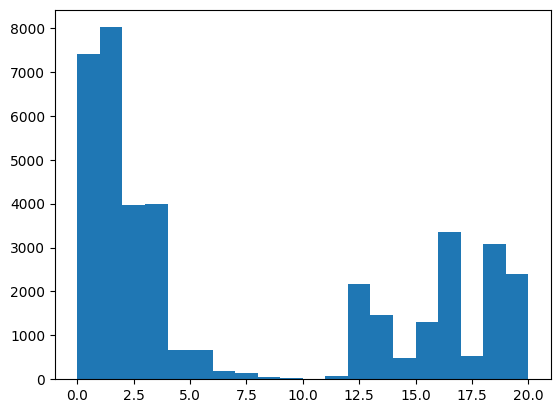

In [299]:
# How many columns are not missing per individual?
plt.hist(df.isna().sum(axis = 1), bins=20);

### Exploranory analysis of catagorical variables

In [300]:
# Look at the characterical variables
df.columns

Index(['client_id', 'gender', 'health_score', 'race_ethnicity',
       'hepatitis_c_antibody_confirmed', 'fasting_glucose_mgdl', 'albumin_gdl',
       'blood_urea_nitrogen_mgdl', 'total_calcium_mgdl', 'bicarbonate_mmoll',
       'creatinine_mgdl', 'glucose_serum_mgdl', 'phosphorus_mgdl',
       'total_protein_gdl', 'sodium_mmoll', 'potassium_mmoll',
       'chloride_mmoll', 'pulse_regular_or_irregular',
       'mil_maximum_inflation_levels_mm_hg',
       'systolic__blood_pres_1st_rdg_mm_hg',
       'diastolic__blood_pres_1st_rdg_mm_hg', 'weight_kg',
       'standing_height_cm', 'waist_circumference_cm'],
      dtype='object')

In [301]:
# gender, race_ethnicity, hepatitis_c_antibody_confirmed, pulse_regular_or_irregular
df_cat= df[["gender", "race_ethnicity", "hepatitis_c_antibody_confirmed", "pulse_regular_or_irregular"]].astype("category")
df_cat.describe()

,gender,race_ethnicity,hepatitis_c_antibody_confirmed,pulse_regular_or_irregular
count,39999,39999.0,28863.0,36598.0
unique,2,5.0,3.0,2.0
top,2,3.0,2.0,1.0
freq,20467,15805.0,28389.0,35600.0


In [302]:
for col in list(df_cat):
  print('variable:', col)
  print(df_cat[col].value_counts(dropna=False).to_string())

variable: gender
2    20467
1    19532
variable: race_ethnicity
3.0    15805
1.0    10627
4.0     9900
2.0     1883
5.0     1784
variable: hepatitis_c_antibody_confirmed
2.0    28389
NaN    11136
1.0      368
5.0      106
variable: pulse_regular_or_irregular
1.0    35600
NaN     3401
2.0      998


As there are 106 records with hepatitis_c_antibody_confirmed = 5, I will assume from now on this is a third catagory.

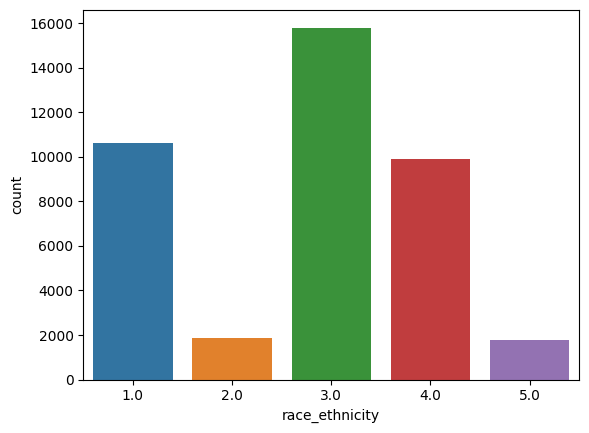

In [303]:
sns.countplot(data=df_cat, x='race_ethnicity');

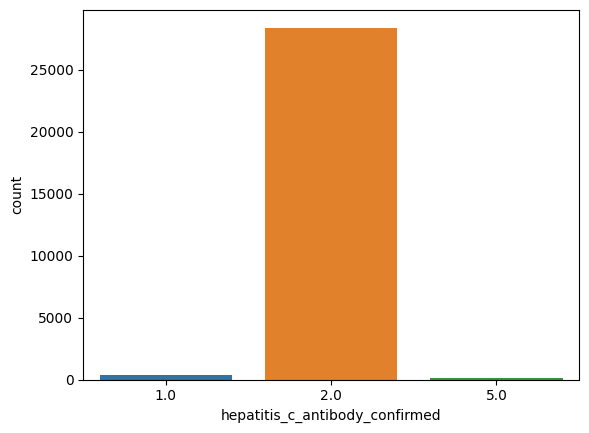

In [304]:
sns.countplot(data=df_cat, x='hepatitis_c_antibody_confirmed');

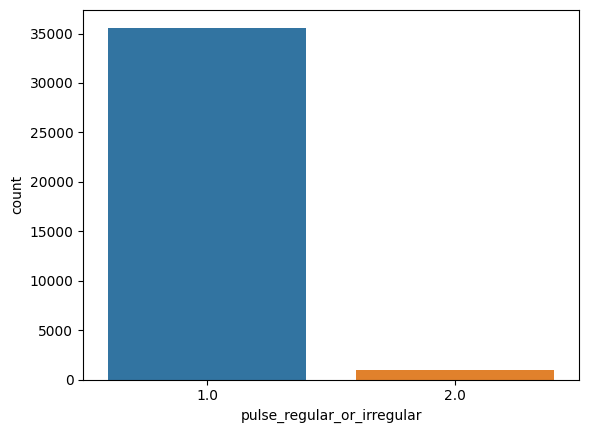

In [305]:
sns.countplot(data=df_cat, x='pulse_regular_or_irregular');

In regression model, catagorical variables need to be included as dummy variables. So including catagorical variable with multiple levels will dramatically increase the number of variables in the model.

#### Correlation analysis

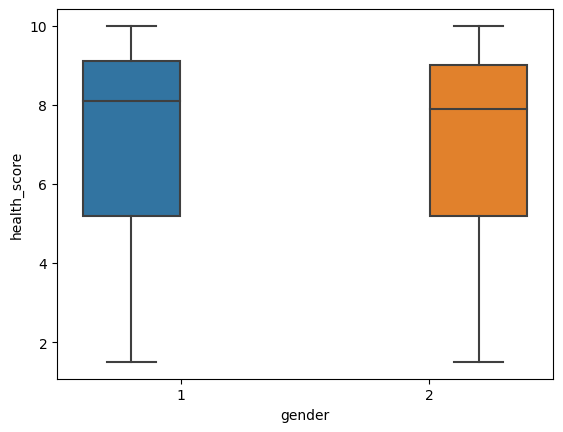

In [306]:
g = sns.boxplot(data=df, x='gender', y='health_score', hue='gender');
g.legend_.remove()

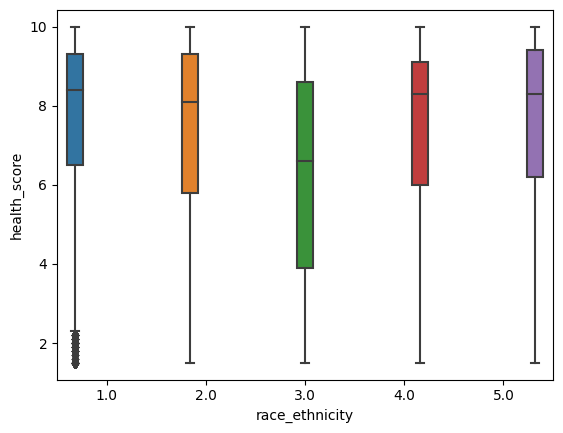

In [307]:
g = sns.boxplot(data=df, x='race_ethnicity', y='health_score', hue='race_ethnicity');
g.legend_.remove()

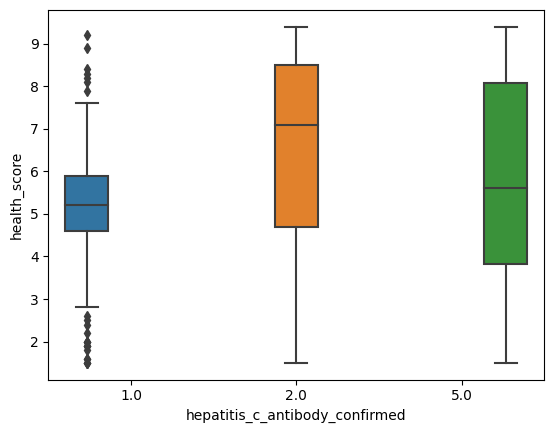

In [308]:
g = sns.boxplot(data=df, x='hepatitis_c_antibody_confirmed', y='health_score', hue='hepatitis_c_antibody_confirmed');
g.legend_.remove()

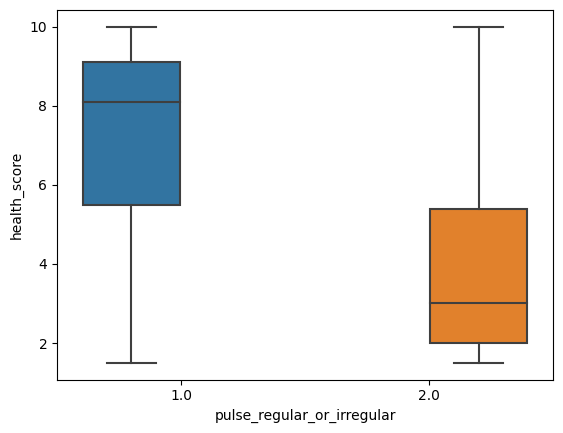

In [309]:
g = sns.boxplot(data=df, x='pulse_regular_or_irregular', y='health_score', hue='pulse_regular_or_irregular');
g.legend_.remove()

In [310]:
# Non-parametric tests: Mann-Whitney U test for comparing two data groups; Kruskal-Wallis H tests for comparing more than 2 groups.
data1 = df[df['gender'] == 1].health_score
data2 = df[df['gender'] == 2].health_score

stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=203694485.000, p=0.001


In [311]:
data1 = df[df['pulse_regular_or_irregular'] == 1].health_score
data2 = df[df['pulse_regular_or_irregular'] == 2].health_score

stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=28972353.000, p=0.000


In [312]:
# generate data in groups based on race
data1 = df[df['race_ethnicity'] == 1].health_score
data2 = df[df['race_ethnicity'] == 2].health_score
data3 = df[df['race_ethnicity'] == 3].health_score
data4 = df[df['race_ethnicity'] == 4].health_score
data5 = df[df['race_ethnicity'] == 5].health_score

# compare between data groups
stat, p = kruskal(data1, data2, data3, data4, data5)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=2219.967, p=0.000


In [313]:
# generate data in groups based on hepatitis_c_antibody_confirmed

data1 = df[df['hepatitis_c_antibody_confirmed'] == 1].health_score
data2 = df[df['hepatitis_c_antibody_confirmed'] == 2].health_score
data3 = df[df['hepatitis_c_antibody_confirmed'] == 5].health_score
# compare between data groups
stat, p = kruskal(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))


Statistics=183.353, p=0.000


In [314]:
stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=3145234.500, p=0.000


This shows that all the catagorical variables may be potential predictors for health_score

### Exploraroty analyses of the continuous variables

In [315]:
df.columns

Index(['client_id', 'gender', 'health_score', 'race_ethnicity',
       'hepatitis_c_antibody_confirmed', 'fasting_glucose_mgdl', 'albumin_gdl',
       'blood_urea_nitrogen_mgdl', 'total_calcium_mgdl', 'bicarbonate_mmoll',
       'creatinine_mgdl', 'glucose_serum_mgdl', 'phosphorus_mgdl',
       'total_protein_gdl', 'sodium_mmoll', 'potassium_mmoll',
       'chloride_mmoll', 'pulse_regular_or_irregular',
       'mil_maximum_inflation_levels_mm_hg',
       'systolic__blood_pres_1st_rdg_mm_hg',
       'diastolic__blood_pres_1st_rdg_mm_hg', 'weight_kg',
       'standing_height_cm', 'waist_circumference_cm'],
      dtype='object')

In [316]:
df_cont = df.drop(['client_id', "gender", "race_ethnicity", "hepatitis_c_antibody_confirmed", "pulse_regular_or_irregular"], axis=1)
df_cont.columns

Index(['health_score', 'fasting_glucose_mgdl', 'albumin_gdl',
       'blood_urea_nitrogen_mgdl', 'total_calcium_mgdl', 'bicarbonate_mmoll',
       'creatinine_mgdl', 'glucose_serum_mgdl', 'phosphorus_mgdl',
       'total_protein_gdl', 'sodium_mmoll', 'potassium_mmoll',
       'chloride_mmoll', 'mil_maximum_inflation_levels_mm_hg',
       'systolic__blood_pres_1st_rdg_mm_hg',
       'diastolic__blood_pres_1st_rdg_mm_hg', 'weight_kg',
       'standing_height_cm', 'waist_circumference_cm'],
      dtype='object')

In [317]:
df_cont.shape

(39999, 19)

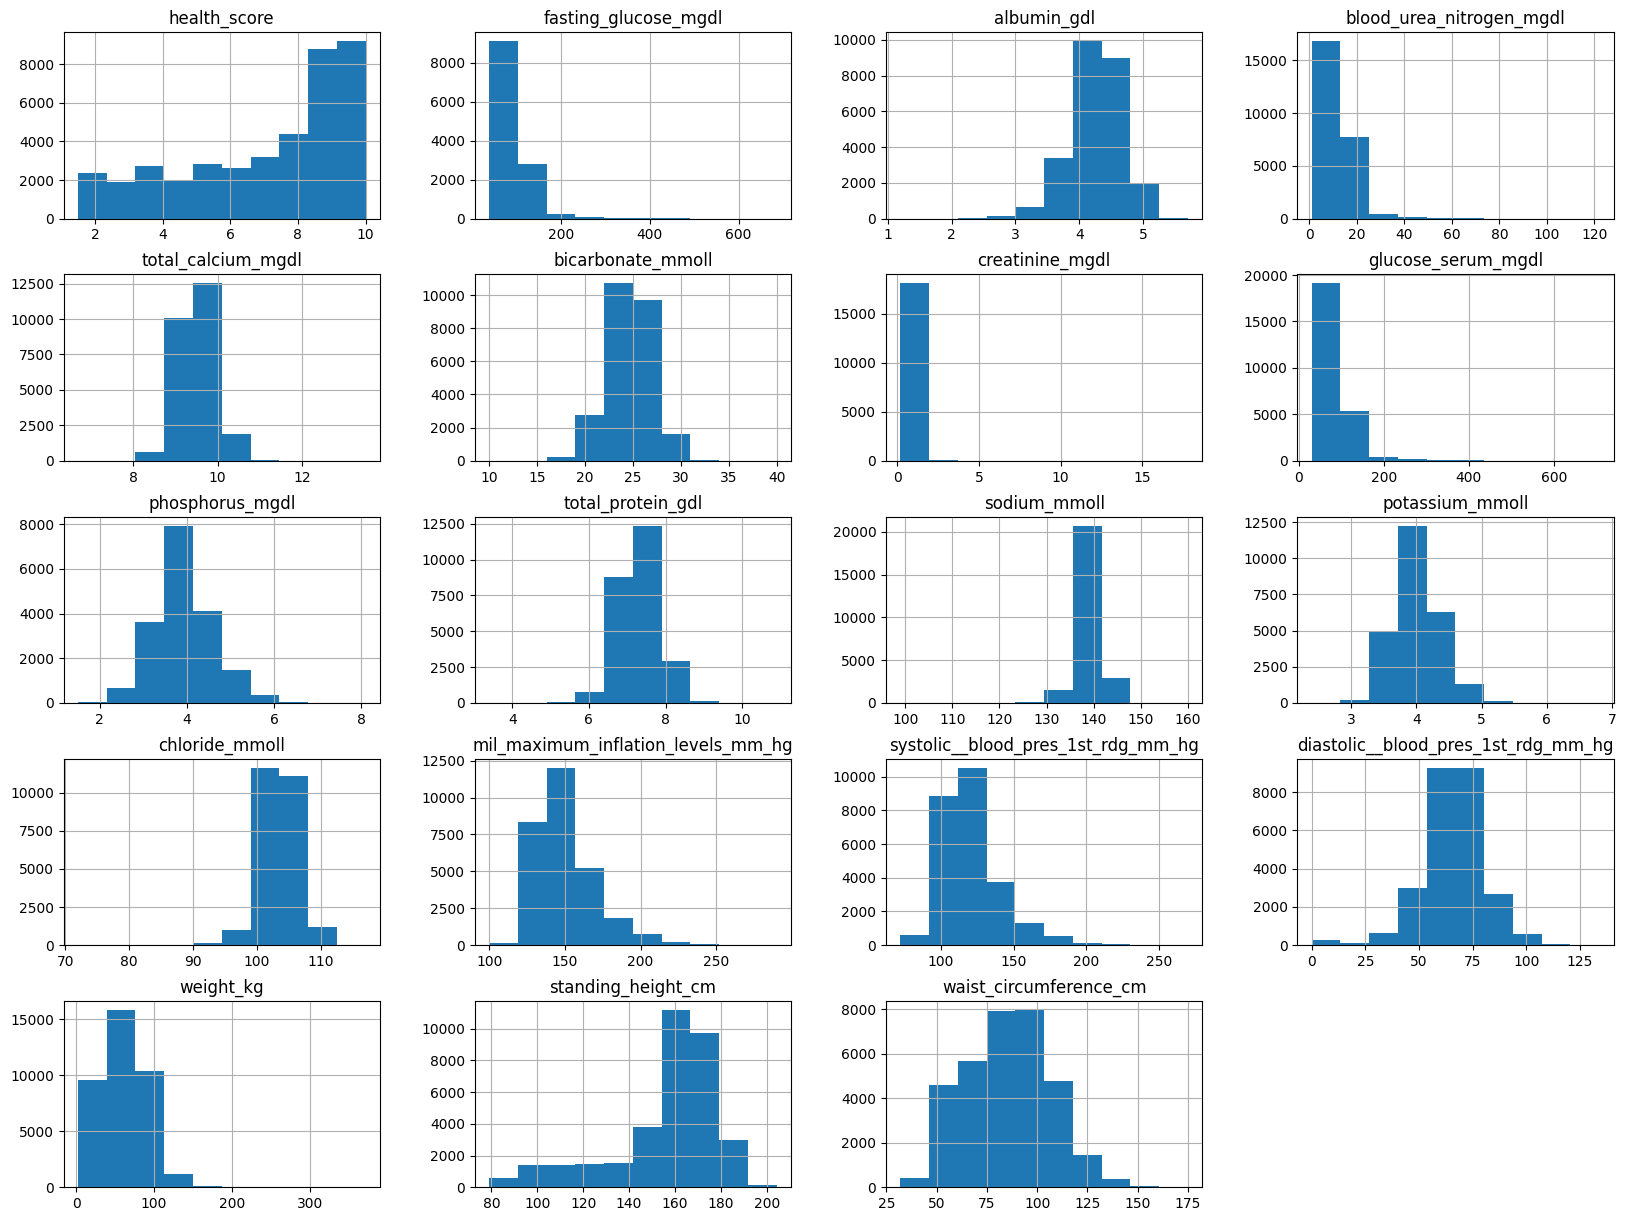

In [318]:
df_cont.hist(figsize=(20,15),layout=(5,4));


From the histograms, we notice following things:
1. , 'fasting_glucose_mgdl', 'blood_urea_nitrogen_mgdl', 'glucose_serum' are right skewed.'systolic__blood_pres_1st_rdg_mm_hg' may be right skewed.
2. 'health_score' is left skewed.  
3. 'standing_height' is left skewed. Notably, there are people who are smaller than adult height, which means the datasets include both children and adults. Normally we would consider children and adult separately. Unfortunately age is not available in the data, we will check later how this may correlate with health_score.
4. There may be be outliers in creatine, sodium, chloride, and weight, we will see how those value affect the results later.
5. Extremely low values for diastolic blood pressure is not normal. The minimum value of this column is 0. These are wrong, should be set as missing.

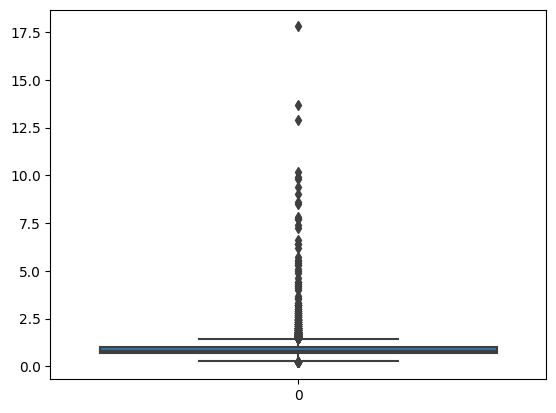

In [319]:
sns.boxplot(df['creatinine_mgdl']);

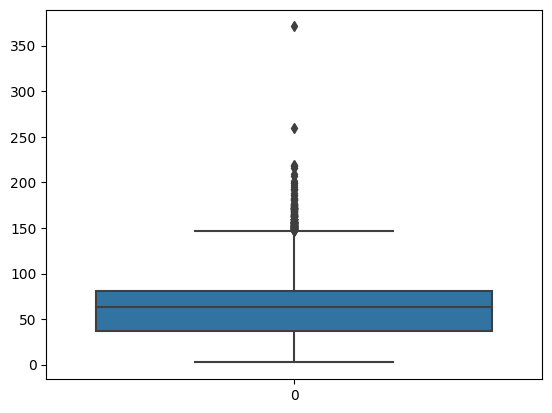

In [320]:
sns.boxplot(df['weight_kg']);

# Correlation analysis

In [321]:
df_cont.corr()

,health_score,fasting_glucose_mgdl,albumin_gdl,blood_urea_nitrogen_mgdl,total_calcium_mgdl,bicarbonate_mmoll,creatinine_mgdl,glucose_serum_mgdl,phosphorus_mgdl,total_protein_gdl,sodium_mmoll,potassium_mmoll,chloride_mmoll,mil_maximum_inflation_levels_mm_hg,systolic__blood_pres_1st_rdg_mm_hg,diastolic__blood_pres_1st_rdg_mm_hg,weight_kg,standing_height_cm,waist_circumference_cm
health_score,1.000000,-0.287970,0.211501,-0.467140,0.163425,-0.188831,-0.280220,-0.278129,0.356118,0.110408,-0.056991,-0.139543,0.097851,-0.652159,-0.623750,-0.294559,-0.598313,-0.494006,-0.617543
fasting_glucose_mgdl,-0.287970,1.000000,-0.057357,0.191750,-0.002465,0.034535,0.120468,0.983740,-0.111262,0.034471,-0.138074,0.080122,-0.212733,0.228214,0.227940,0.088156,0.182495,0.025031,0.254367
albumin_gdl,0.211501,-0.057357,1.000000,0.035396,0.490708,0.138102,-0.027371,-0.101752,0.070385,0.535337,0.183926,0.073781,-0.176440,-0.067115,-0.057732,0.048632,-0.179865,0.187892,-0.302624
blood_urea_nitrogen_mgdl,-0.467140,0.191750,0.035396,1.000000,-0.021693,0.048874,0.512976,0.187102,-0.056899,0.021622,0.083787,0.238636,-0.077477,0.298114,0.278237,0.056641,0.108138,0.081324,0.170483
total_calcium_mgdl,0.163425,-0.002465,0.490708,-0.021693,1.000000,0.172967,0.015471,-0.017396,0.234076,0.360388,0.163184,0.168096,-0.121086,-0.030399,-0.027901,-0.036955,-0.147490,0.069192,-0.212430
bicarbonate_mmoll,-0.188831,0.034535,0.138102,0.048874,0.172967,1.000000,0.131311,0.040196,-0.028291,0.004475,0.286020,0.050732,-0.231047,0.142486,0.129529,0.048223,-0.006370,0.148228,-0.050453
creatinine_mgdl,-0.280220,0.120468,-0.027371,0.512976,0.015471,0.131311,1.000000,0.113257,-0.011546,-0.020932,0.089269,0.139885,-0.057351,0.245714,0.221102,0.101365,0.167440,0.247725,0.142788
glucose_serum_mgdl,-0.278129,0.983740,-0.101752,0.187102,-0.017396,0.040196,0.113257,1.000000,-0.125944,-0.010432,-0.118318,0.090167,-0.170269,0.206805,0.206952,0.058494,0.165384,0.015838,0.234857
phosphorus_mgdl,0.356118,-0.111262,0.070385,-0.056899,0.234076,-0.028291,-0.011546,-0.125944,1.000000,-0.021040,0.008603,0.059980,-0.019814,-0.230558,-0.228800,-0.205657,-0.238855,-0.134514,-0.269742
total_protein_gdl,0.110408,0.034471,0.535337,0.021622,0.360388,0.004475,-0.020932,-0.010432,-0.021040,1.000000,0.021406,0.046677,-0.258381,0.027432,0.038409,0.107780,-0.071015,0.034366,-0.128317


In [322]:
# since health_score is skewed
df_cont.corr(method = 'spearman')

,health_score,fasting_glucose_mgdl,albumin_gdl,blood_urea_nitrogen_mgdl,total_calcium_mgdl,bicarbonate_mmoll,creatinine_mgdl,glucose_serum_mgdl,phosphorus_mgdl,total_protein_gdl,sodium_mmoll,potassium_mmoll,chloride_mmoll,mil_maximum_inflation_levels_mm_hg,systolic__blood_pres_1st_rdg_mm_hg,diastolic__blood_pres_1st_rdg_mm_hg,weight_kg,standing_height_cm,waist_circumference_cm
health_score,1.000000,-0.411834,0.263748,-0.452066,0.222803,-0.171748,-0.396819,-0.385312,0.400535,0.131034,-0.064883,-0.095654,0.071510,-0.642037,-0.610570,-0.412695,-0.731847,-0.546939,-0.721562
fasting_glucose_mgdl,-0.411834,1.000000,-0.006247,0.278264,0.009519,0.107028,0.237834,0.916090,-0.196642,0.043051,0.025273,0.094925,-0.122708,0.363260,0.371534,0.173904,0.296527,0.101209,0.367298
albumin_gdl,0.263748,-0.006247,1.000000,0.071918,0.486825,0.097804,0.020525,-0.073209,0.087557,0.504043,0.149600,0.056685,-0.205969,-0.078504,-0.068025,0.014152,-0.180216,0.195824,-0.303760
blood_urea_nitrogen_mgdl,-0.452066,0.278264,0.071918,1.000000,-0.018034,0.079711,0.406102,0.247473,-0.115320,0.034160,0.102888,0.209439,-0.102394,0.303238,0.285267,0.143366,0.153150,0.132067,0.187207
total_calcium_mgdl,0.222803,0.009519,0.486825,-0.018034,1.000000,0.160247,0.097730,-0.022608,0.252539,0.346951,0.138866,0.164460,-0.147242,-0.033532,-0.031435,-0.051958,-0.156990,0.075753,-0.225770
bicarbonate_mmoll,-0.171748,0.107028,0.097804,0.079711,0.160247,1.000000,0.256247,0.105092,-0.022265,-0.020126,0.284752,0.054493,-0.217425,0.150557,0.133138,0.055639,0.006154,0.160212,-0.048467
creatinine_mgdl,-0.396819,0.237834,0.020525,0.406102,0.097730,0.256247,1.000000,0.205722,-0.149544,-0.050041,0.152293,0.114483,-0.027410,0.344913,0.305321,0.184463,0.323103,0.471888,0.218800
glucose_serum_mgdl,-0.385312,0.916090,-0.073209,0.247473,-0.022608,0.105092,0.205722,1.000000,-0.193251,-0.017883,0.040889,0.106244,-0.048141,0.326864,0.332955,0.148444,0.253365,0.072351,0.323590
phosphorus_mgdl,0.400535,-0.196642,0.087557,-0.115320,0.252539,-0.022265,-0.149544,-0.193251,1.000000,-0.010606,-0.001053,0.032533,-0.023437,-0.254002,-0.251533,-0.225518,-0.251557,-0.133621,-0.268236
total_protein_gdl,0.131034,0.043051,0.504043,0.034160,0.346951,-0.020126,-0.050041,-0.017883,-0.010606,1.000000,-0.004547,0.041524,-0.283600,0.018958,0.032528,0.101819,-0.074603,0.033641,-0.128584


Sodium, potassium and chloride have very low correlation with health_score, we may exclude them from modeling.

In [323]:
df_cont.corr(method = 'spearman') > 0.8

,health_score,fasting_glucose_mgdl,albumin_gdl,blood_urea_nitrogen_mgdl,total_calcium_mgdl,bicarbonate_mmoll,creatinine_mgdl,glucose_serum_mgdl,phosphorus_mgdl,total_protein_gdl,sodium_mmoll,potassium_mmoll,chloride_mmoll,mil_maximum_inflation_levels_mm_hg,systolic__blood_pres_1st_rdg_mm_hg,diastolic__blood_pres_1st_rdg_mm_hg,weight_kg,standing_height_cm,waist_circumference_cm
health_score,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
fasting_glucose_mgdl,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
albumin_gdl,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
blood_urea_nitrogen_mgdl,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
total_calcium_mgdl,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bicarbonate_mmoll,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
creatinine_mgdl,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
glucose_serum_mgdl,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
phosphorus_mgdl,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
total_protein_gdl,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


Fasting_glucose and glucose_serum are highly correlated. mil_maximum_inflation_levels_mm_hg and systolic__blood_pres_1st_rdg_mm_hg are highly correlated. weight_kg and waist_circumference_cm are highly correlated. Probably only one of them need to be included in the prediction model.

In [324]:
cont_ind_var = df_cont.columns[1:]

In [325]:
cont_dep_var = df_cont.columns[0]

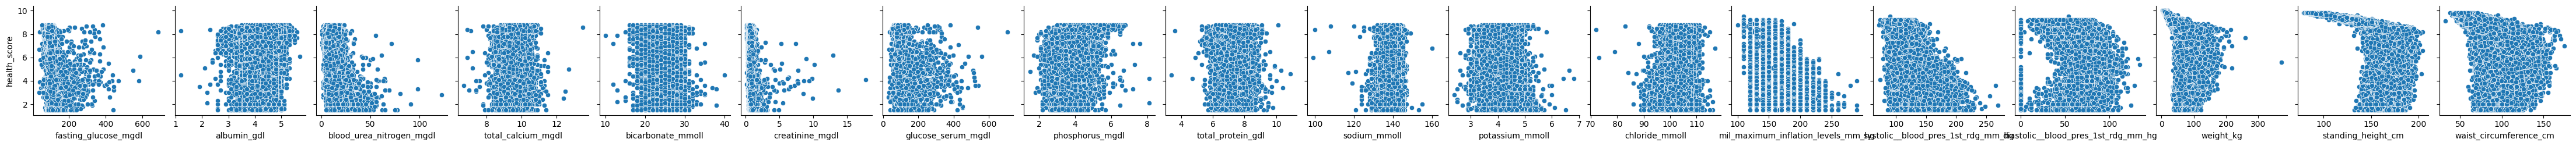

In [326]:
# scatter plot between dependent variables and independent variables
sns.pairplot(df_cont, x_vars = cont_ind_var , y_vars = cont_dep_var);


From these figures, we can see the following:

1. some strange value 0 for diastolic blood pressure, this has been observed before, and the 0 values should be set as missing. For individuals with very low diastolic blood pressure, they either have very high health score or very low health score. As such low diastolic blood pressure is truely abnormal, I doubt if these data are valid. As the nomal range of diastolic blood pressure is 60-80. The people with a blood pressure lower than 60 are likely to have low health scores. Also, in the correlation table shown above, the correlation between systolic and diastolic blood pression is low, and this is likely to be due to the low quality of the diastolic blood pressure measurement. I would consider not to use this variable (preferred), or remove records below 50.
2. the health scores are in general high for children, those having small weights and low standing heights. It would make sense to exclude these people from analysis as 1. they should be analysed separately biologically speaking; 3. they make data being skewed and lack of linearity with the predicted value.
4. Outliers are seen for fasting_glucose_mgdl, sodium_mmoll, chloride_mmol.
5. More variations in health scores are seen for lower values of blood_urea_nitrogen, mil_maximum_inflation_level, systolic_blood_pres_1st_rdg_mm_hg. They were right skewed and should be log transformed when fitting model.

# Data preparation



In [327]:
df.columns

Index(['client_id', 'gender', 'health_score', 'race_ethnicity',
       'hepatitis_c_antibody_confirmed', 'fasting_glucose_mgdl', 'albumin_gdl',
       'blood_urea_nitrogen_mgdl', 'total_calcium_mgdl', 'bicarbonate_mmoll',
       'creatinine_mgdl', 'glucose_serum_mgdl', 'phosphorus_mgdl',
       'total_protein_gdl', 'sodium_mmoll', 'potassium_mmoll',
       'chloride_mmoll', 'pulse_regular_or_irregular',
       'mil_maximum_inflation_levels_mm_hg',
       'systolic__blood_pres_1st_rdg_mm_hg',
       'diastolic__blood_pres_1st_rdg_mm_hg', 'weight_kg',
       'standing_height_cm', 'waist_circumference_cm'],
      dtype='object')

### Selection of variables
As was described above, I will include all the catagorical variables. Catagorical variables with more than one levels will be converted into dummy variables for modeling.
I will exclude:
1. one of two highly correlated variables based on missing rate: between fasting_glucose and glucose_serum, glucose_serum is selected because of lower missing rate, although fasting glucose is normally a better measurement for diabetes diagnosis. Similarly weight is included and waist circumstances excluded. mil_maximum_inflation_levels_mm_hg selected over systolic__blood_pres_1st_rdg_mm_hg,
2. diastolic blood pressure as I do not trust the data. However, in real life, it should be investigated from source data to find out whether there were truly something wrong with the data.
3. Sodium, potassium and chloride as they correlate weakly with health_score.

In [328]:
df_select = df.drop(['fasting_glucose_mgdl',
                         'systolic__blood_pres_1st_rdg_mm_hg',
                         'diastolic__blood_pres_1st_rdg_mm_hg',
                         'waist_circumference_cm',
                         'sodium_mmoll',
                         'potassium_mmoll',
                         'chloride_mmoll'], axis = 1)

### Handling missing data
Assuming all the variables were MCAR or MAR, it is possible to use complete data only, or use multiple imputation for training data. Here for simplicity, I only use data that are complete for selected variables

In [329]:
df_select_complete = df_select.dropna(axis = 0, how = 'any')
df_select_complete.shape

(17255, 17)

Here it can be seen that by selecting variables, we have more data records that are complete.

### Reassessing data distribution.

In [330]:
df_sc_cont = df_select_complete.drop(['client_id', "gender", "race_ethnicity", "hepatitis_c_antibody_confirmed", "pulse_regular_or_irregular"], axis=1)
df_sc_cont.shape

(17255, 12)

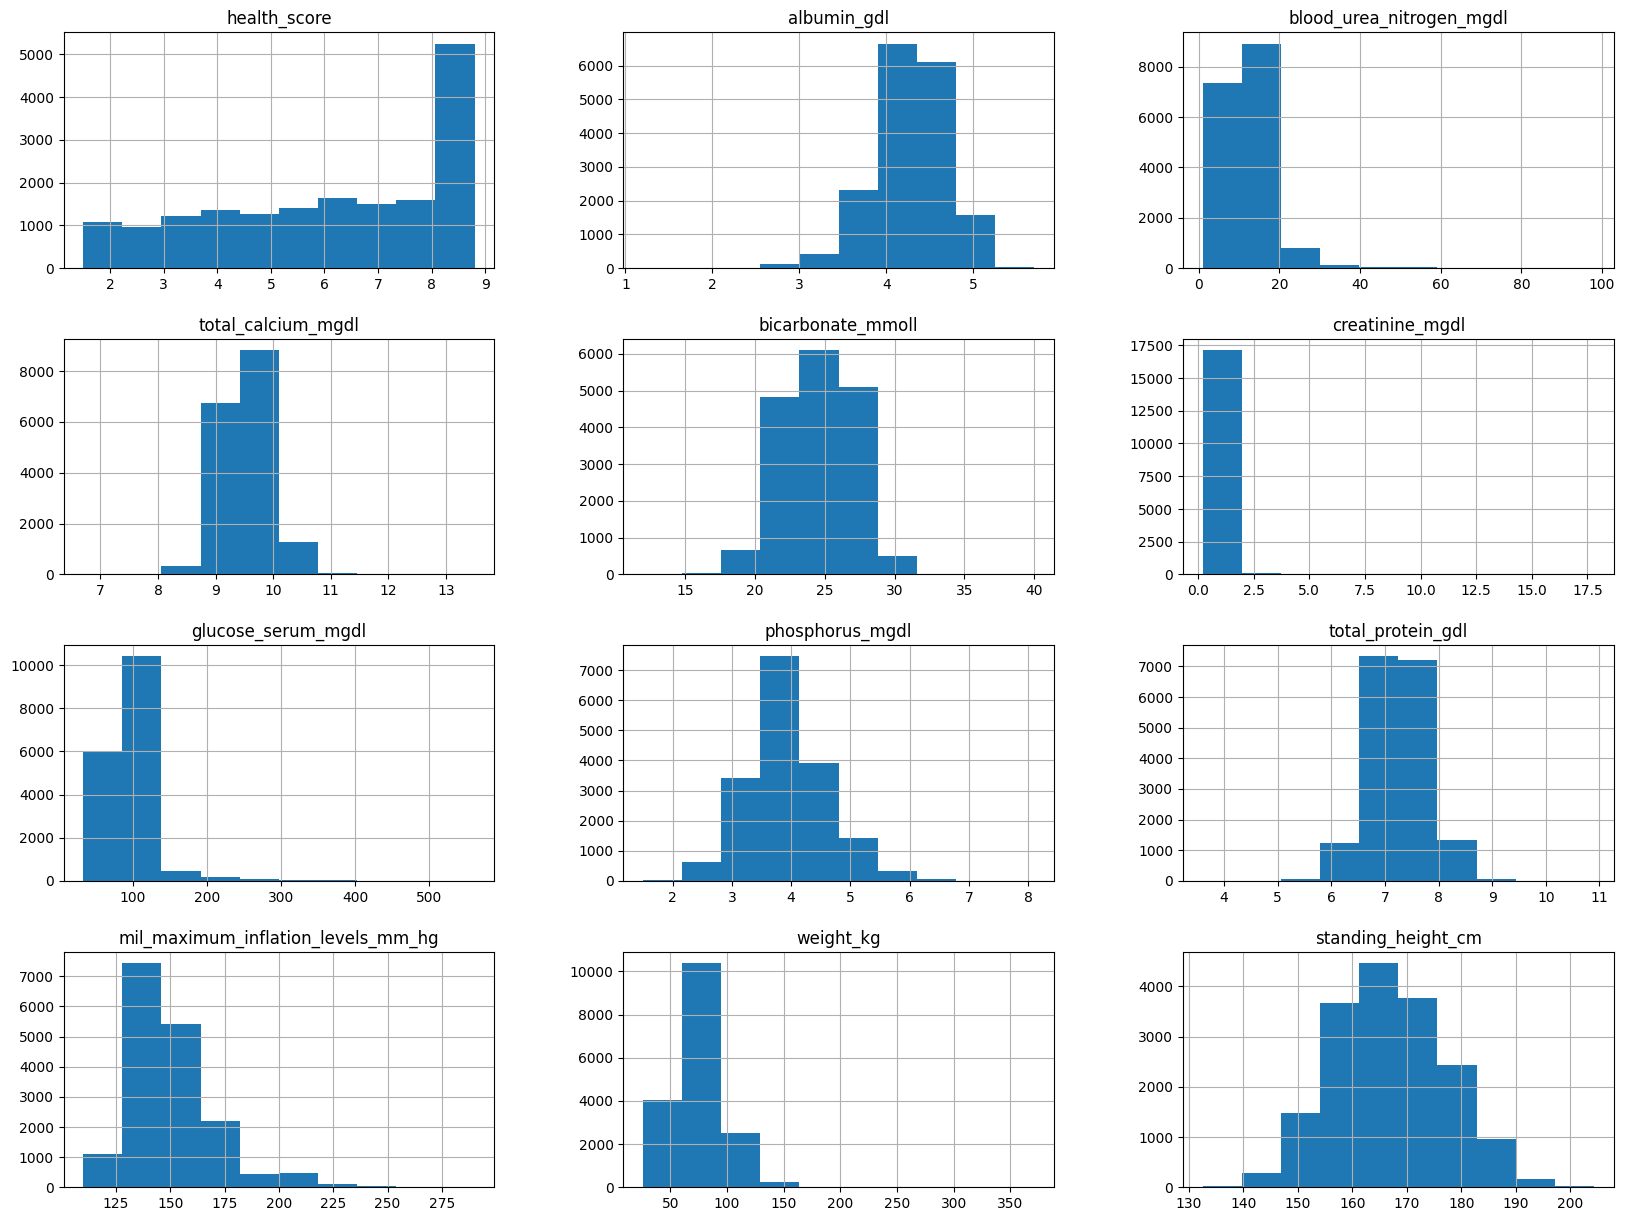

In [331]:
df_sc_cont.hist(figsize=(20,15),layout=(4,3));

Before my plan of excluding children, it seems that excluding records with missing values also removed children in the dataset.
I notice there are likely outliers in creatine, weight, blood_urea_nitrogen and glucose_serum_mgdl. Blood_urea_nitrogen and glucose_serum_mgdl also seem to be right skewed. Let's look at the scatter plot again and check if log-transformation is needed.

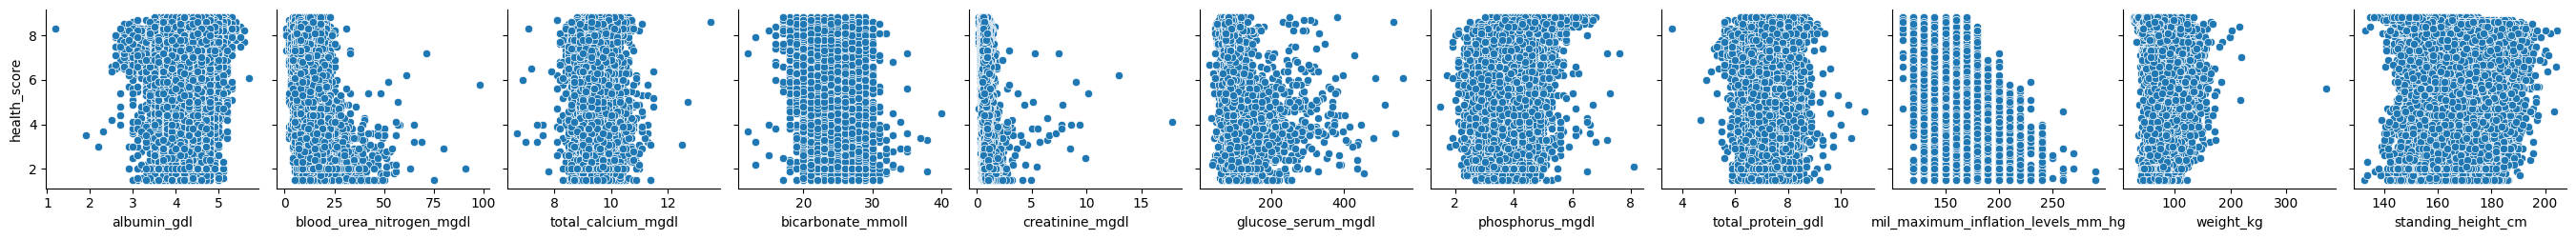

In [332]:
# scatter plot between dependent variables and independent variables
sns.pairplot(df_sc_cont, x_vars = df_sc_cont.columns[1:] , y_vars = ['health_score']);


In [333]:
df_sc_cont.columns

Index(['health_score', 'albumin_gdl', 'blood_urea_nitrogen_mgdl',
       'total_calcium_mgdl', 'bicarbonate_mmoll', 'creatinine_mgdl',
       'glucose_serum_mgdl', 'phosphorus_mgdl', 'total_protein_gdl',
       'mil_maximum_inflation_levels_mm_hg', 'weight_kg',
       'standing_height_cm'],
      dtype='object')

From the figures, I wold make log transformation for blood_urea_nitrogen_mgdl, glucose_serum_mgdl, creatinine_mgdl, mil_maximum_inflation_levels_mm_hg

### Log-transformation for right skewed variables

In [334]:
df_select_complete['log_blood_urea_nitrogen_mgdl'] = np.log(df_select_complete['blood_urea_nitrogen_mgdl'])
df_select_complete['log_glucose_serum_mgdl'] = np.log(df_select_complete['glucose_serum_mgdl'])
df_select_complete['log_creatinine_mgdl'] = np.log(df_select_complete['creatinine_mgdl'])
df_select_complete['log_mil_maximum_inflation_levels_mm_hg'] = np.log(df_select_complete['mil_maximum_inflation_levels_mm_hg'])


<ipython-input-334-9c23e8d9dc23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select_complete['log_blood_urea_nitrogen_mgdl'] = np.log(df_select_complete['blood_urea_nitrogen_mgdl'])
<ipython-input-334-9c23e8d9dc23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select_complete['log_glucose_serum_mgdl'] = np.log(df_select_complete['glucose_serum_mgdl'])
<ipython-input-334-9c23e8d9dc23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [335]:
df_select_complete.describe()

,client_id,gender,health_score,race_ethnicity,hepatitis_c_antibody_confirmed,albumin_gdl,blood_urea_nitrogen_mgdl,total_calcium_mgdl,bicarbonate_mmoll,creatinine_mgdl,glucose_serum_mgdl,phosphorus_mgdl,total_protein_gdl,pulse_regular_or_irregular,mil_maximum_inflation_levels_mm_hg,weight_kg,standing_height_cm,log_blood_urea_nitrogen_mgdl,log_glucose_serum_mgdl,log_creatinine_mgdl,log_mil_maximum_inflation_levels_mm_hg
count,17255.000000,17255.000000,17255.000000,17255.000000,17255.000000,17255.000000,17255.000000,17255.000000,17255.000000,17255.000000,17255.000000,17255.000000,17255.000000,17255.000000,17255.000000,17255.000000,17255.000000,17255.000000,17255.000000,17255.000000,17255.000000
mean,28510.395480,1.509244,6.091962,2.758505,1.997914,4.279218,12.108316,9.532049,24.472095,0.840071,95.633266,3.926346,7.255398,1.035642,149.401333,76.023407,166.817382,2.406235,4.529641,-0.227703,4.997797
std,11530.758582,0.499929,2.214461,1.178580,0.220635,0.391585,5.562060,0.383620,2.260023,0.384607,31.419856,0.662771,0.510749,0.185401,20.639082,20.615391,10.245156,0.418607,0.222219,0.310391,0.130754
min,5002.000000,1.000000,1.500000,1.000000,1.000000,1.200000,1.000000,6.700000,12.000000,0.200000,33.000000,1.500000,3.600000,1.000000,110.000000,25.900000,132.500000,0.000000,3.496508,-1.609438,4.700480
25%,23226.000000,1.000000,4.200000,1.000000,2.000000,4.100000,9.000000,9.300000,23.000000,0.700000,83.000000,3.500000,6.900000,1.000000,140.000000,61.200000,159.300000,2.197225,4.418841,-0.356675,4.941642
50%,30298.000000,2.000000,6.500000,3.000000,2.000000,4.300000,11.000000,9.500000,25.000000,0.800000,89.000000,3.900000,7.300000,1.000000,150.000000,73.600000,166.400000,2.397895,4.488636,-0.223144,5.010635
75%,37626.500000,2.000000,8.200000,4.000000,2.000000,4.500000,14.000000,9.800000,26.000000,1.000000,98.000000,4.300000,7.600000,1.000000,160.000000,87.700000,174.000000,2.639057,4.584967,0.000000,5.075174
max,45004.000000,2.000000,8.800000,5.000000,5.000000,5.700000,98.000000,13.500000,40.000000,17.800000,561.000000,8.100000,10.900000,2.000000,290.000000,371.000000,204.400000,4.584967,6.329721,2.879198,5.669881


In [336]:
df_select_complete.shape

(17255, 21)

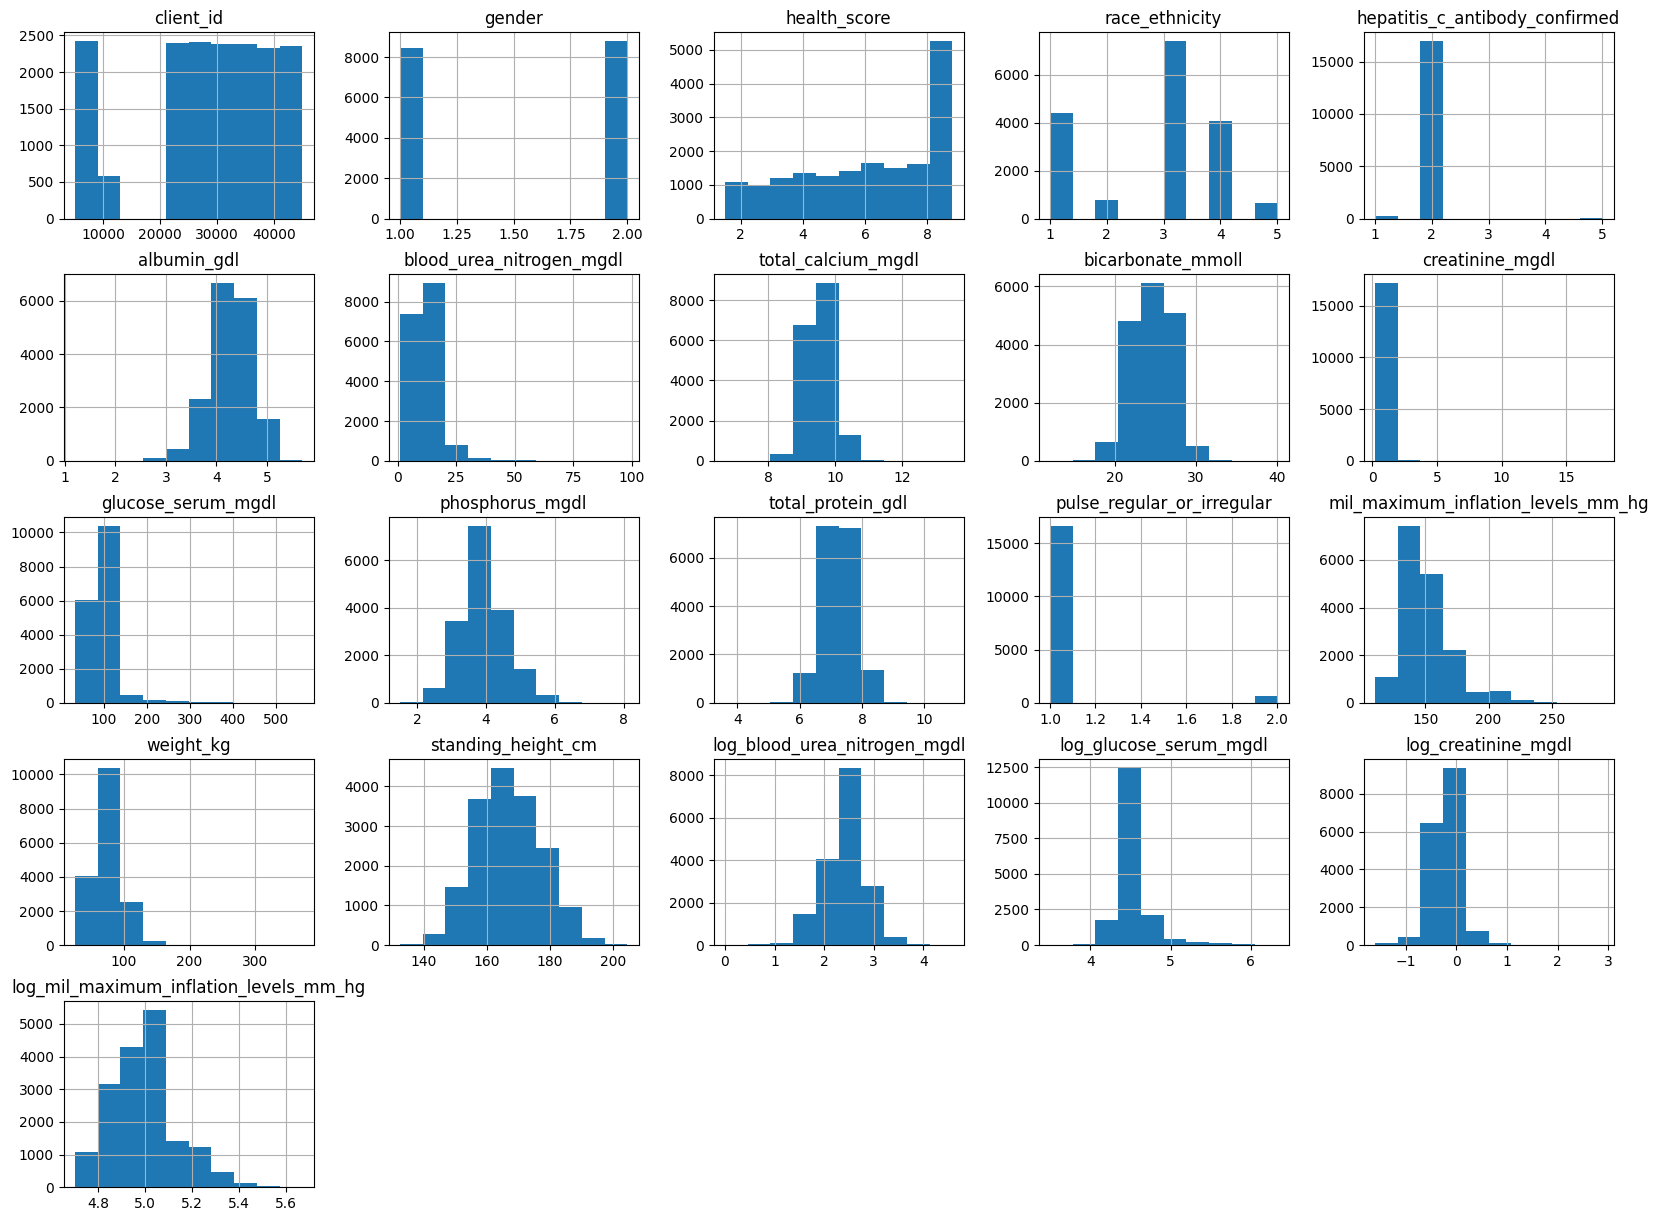

In [337]:
# Check the distribution of the variables in the complete dataset
df_select_complete.hist(figsize=(20,15),layout=(5,5));

The distribution of those right-skewed variables look normal now.

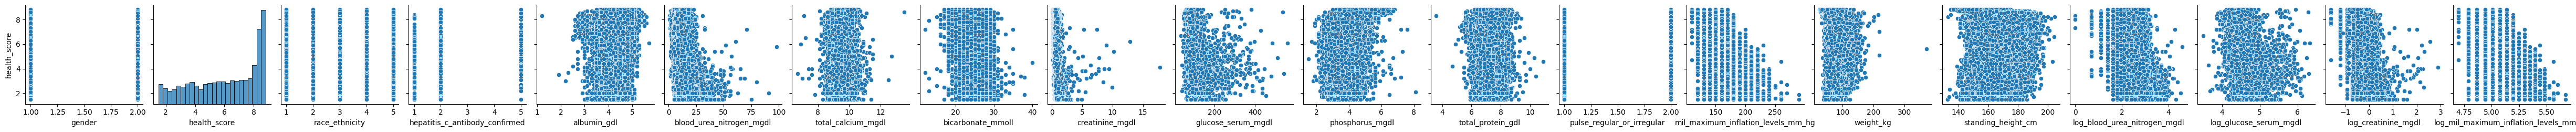

In [338]:
# Quickly visualize the correlation between health score and the predictors
sns.pairplot(df_select_complete, x_vars = df_select_complete.columns[1:] , y_vars = ['health_score']);


# Machine learning model
First, we will try to fit simple linear regression model although health_score is a left-skewed continuous outcome.

We could also divide health_score in two groups: high health score (>= 0.6) and low health screo (<0.6) and fit a logistic regression model, depending on the utility of the prediction model. Continuous variable retains most information and is more powerful than transforming it to a dichotomous variable.

As the predicted variable health_score is left-skewed, it could be suitable to divide it by 10 and fit to a beta regression model.

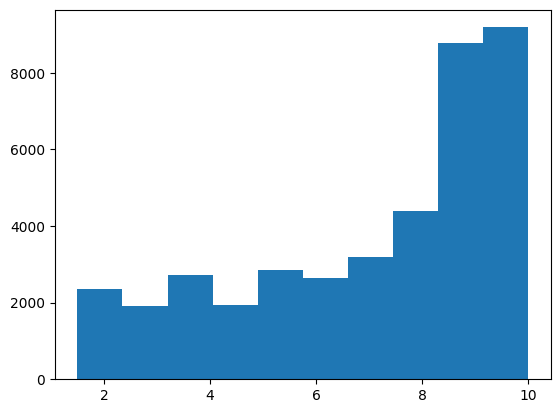

In [339]:
plt.hist(df.health_score);

In [340]:
# Create a vector for the predicted variable
y = df_select_complete['health_score']
y.describe()

count    17255.000000
mean         6.091962
std          2.214461
min          1.500000
25%          4.200000
50%          6.500000
75%          8.200000
max          8.800000
Name: health_score, dtype: float64

In [341]:
# Create a vector for the predicted variable which is suitable for fitting beta regression
y_beta = df_select_complete['health_score']/10
y.describe()

count    17255.000000
mean         6.091962
std          2.214461
min          1.500000
25%          4.200000
50%          6.500000
75%          8.200000
max          8.800000
Name: health_score, dtype: float64

In [342]:
# Dichotomize the predicted value for logistic regression.
# This method assumes that the purpose of the project is to identify individuals with low health scores.
y_bi = df_select_complete['health_score'] < 6
y_bi.describe()

count     17255
unique        2
top       False
freq       9768
Name: health_score, dtype: object

In [343]:
# Catagorical variables with more than one level need to be dummies
X_cat = df_select_complete[['gender', 'race_ethnicity', 'hepatitis_c_antibody_confirmed', 'pulse_regular_or_irregular']]
X_dummies = get_dummies(data = X_cat, columns =['race_ethnicity', 'hepatitis_c_antibody_confirmed'])

In [344]:
X_dummies.head(10)

,gender,pulse_regular_or_irregular,race_ethnicity_1.0,race_ethnicity_2.0,race_ethnicity_3.0,race_ethnicity_4.0,race_ethnicity_5.0,hepatitis_c_antibody_confirmed_1.0,hepatitis_c_antibody_confirmed_2.0,hepatitis_c_antibody_confirmed_5.0
1,1,2.0,1,0,0,0,0,0,1,0
5,2,1.0,1,0,0,0,0,0,1,0
7,2,1.0,0,0,1,0,0,0,1,0
8,1,1.0,0,0,1,0,0,0,1,0
11,2,1.0,1,0,0,0,0,0,1,0
12,2,1.0,0,0,0,1,0,0,1,0
15,1,1.0,0,0,0,1,0,0,1,0
16,1,1.0,1,0,0,0,0,0,1,0
17,1,1.0,0,1,0,0,0,0,1,0
19,1,1.0,1,0,0,0,0,0,1,0


In [345]:
df_select_complete.columns

Index(['client_id', 'gender', 'health_score', 'race_ethnicity',
       'hepatitis_c_antibody_confirmed', 'albumin_gdl',
       'blood_urea_nitrogen_mgdl', 'total_calcium_mgdl', 'bicarbonate_mmoll',
       'creatinine_mgdl', 'glucose_serum_mgdl', 'phosphorus_mgdl',
       'total_protein_gdl', 'pulse_regular_or_irregular',
       'mil_maximum_inflation_levels_mm_hg', 'weight_kg', 'standing_height_cm',
       'log_blood_urea_nitrogen_mgdl', 'log_glucose_serum_mgdl',
       'log_creatinine_mgdl', 'log_mil_maximum_inflation_levels_mm_hg'],
      dtype='object')

In [346]:
X_cont = df_select_complete[['albumin_gdl', 'total_calcium_mgdl', 'bicarbonate_mmoll', 'phosphorus_mgdl',
       'total_protein_gdl', 'weight_kg', 'standing_height_cm', 'log_blood_urea_nitrogen_mgdl', 'log_glucose_serum_mgdl',
       'log_creatinine_mgdl', 'log_mil_maximum_inflation_levels_mm_hg']]
X_cont.shape

(17255, 11)

In [347]:
# Create a matrix for the predictors
X = pd.concat([X_dummies, X_cont], axis = 'columns')
X.head()

,gender,pulse_regular_or_irregular,race_ethnicity_1.0,race_ethnicity_2.0,race_ethnicity_3.0,race_ethnicity_4.0,race_ethnicity_5.0,hepatitis_c_antibody_confirmed_1.0,hepatitis_c_antibody_confirmed_2.0,hepatitis_c_antibody_confirmed_5.0,albumin_gdl,total_calcium_mgdl,bicarbonate_mmoll,phosphorus_mgdl,total_protein_gdl,weight_kg,standing_height_cm,log_blood_urea_nitrogen_mgdl,log_glucose_serum_mgdl,log_creatinine_mgdl,log_mil_maximum_inflation_levels_mm_hg
1,1,2.0,1,0,0,0,0,0,1,0,4.2,8.9,24.0,3.8,7.3,66.7,158.7,2.197225,4.543295,-0.510826,5.192957
5,2,1.0,1,0,0,0,0,0,1,0,5.3,9.4,28.0,3.8,8.3,80.5,156.9,2.484907,4.382027,-0.693147,5.010635
7,2,1.0,0,0,1,0,0,0,1,0,4.4,9.0,25.0,2.9,7.8,68.6,159.9,2.708050,4.418841,-0.693147,4.867534
8,1,1.0,0,0,1,0,0,0,1,0,4.3,9.3,23.0,3.6,6.9,83.9,185.6,3.091042,4.836282,-0.223144,5.192957
11,2,1.0,1,0,0,0,0,0,1,0,4.6,8.7,23.0,3.1,7.5,61.5,150.6,2.397895,4.465908,-1.203973,4.700480


In [348]:
X.shape

(17255, 21)

### Linear regression model

This could potentially work even though y is left skewed.


In [366]:
# Split training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)

# Fit model
model = LinearRegression().fit(X_train, y_train)

In [358]:
y_train

39261    6.0
22063    4.3
18819    8.4
17393    3.0
32722    2.9
        ... 
19056    2.2
28019    7.1
26551    5.7
23162    8.8
23166    3.8
Name: health_score, Length: 12078, dtype: float64

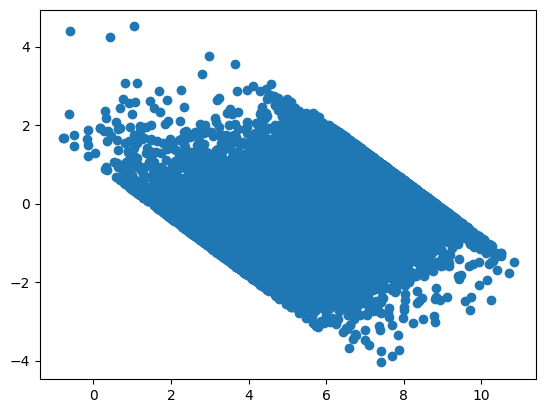

In [359]:
# Validation
# Evaluating the trained model on training data
y_prediction = model.predict(X_train)

# Residual plot
#create instance of influence
residuals = y_train - y_prediction
#obtain standardized residuals
standardized_residuals = residuals/np.std(residuals)

# Residual plot.
plt.scatter(y = standardized_residuals, x = y_prediction)
plt.show()


Here we can see that simple linear regression is not suitable for modeling health_score as the assumption of linearity is violated

In [365]:
X_train_sm = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_sm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           health_score   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     1059.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:16:54   Log-Likelihood:                -20855.
No. Observations:               12078   AIC:                         4.175e+04
Df Residuals:                   12058   BIC:                         4.190e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [361]:
X.corr() > 0.6 # I can't spot high correlations between variables

,gender,pulse_regular_or_irregular,race_ethnicity_1.0,race_ethnicity_2.0,race_ethnicity_3.0,race_ethnicity_4.0,race_ethnicity_5.0,hepatitis_c_antibody_confirmed_1.0,hepatitis_c_antibody_confirmed_2.0,hepatitis_c_antibody_confirmed_5.0,albumin_gdl,total_calcium_mgdl,bicarbonate_mmoll,phosphorus_mgdl,total_protein_gdl,weight_kg,standing_height_cm,log_blood_urea_nitrogen_mgdl,log_glucose_serum_mgdl,log_creatinine_mgdl,log_mil_maximum_inflation_levels_mm_hg
gender,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
pulse_regular_or_irregular,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
race_ethnicity_1.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
race_ethnicity_2.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
race_ethnicity_3.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
race_ethnicity_4.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
race_ethnicity_5.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
hepatitis_c_antibody_confirmed_1.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
hepatitis_c_antibody_confirmed_2.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
hepatitis_c_antibody_confirmed_5.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [362]:
X_test.shape

(5177, 21)

In [368]:
# Evaluation of model prediction
y_prediction = model.predict(X_test)
score = r2_score(y_test, y_prediction)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 62.0%


In [369]:
score = mean_absolute_error(y_test, y_prediction)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 1.08


In [371]:
score = np.sqrt(mean_absolute_error(y_test, y_prediction))
print("The root Mean Absolute Error of our Model is {}".format(round(score, 2)))

The root Mean Absolute Error of our Model is 1.04


### Logistic regression model

In [372]:
# Split the dataset into training and test datasets
# Logistic regression without scaling failed to converge so before fitting the model, X is normalized
X_scale = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_bi, test_size=0.3, random_state=0)

# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [373]:
print(logreg.coef_)

[[ 0.3348915   0.20864695 -0.08814757 -0.04894598  0.26843589 -0.18758018
  -0.02542225  0.13773045 -0.10813701 -0.02900699 -0.43306741 -0.21516787
   0.45502423 -0.49376378  0.12104181  0.14495717 -0.37788073  0.83095001
   0.62506404  0.4969633   1.32693517]]


In [374]:
# model evaluation
y_prediction = logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_prediction)
cnf_matrix

array([[2573,  349],
       [ 486, 1769]])

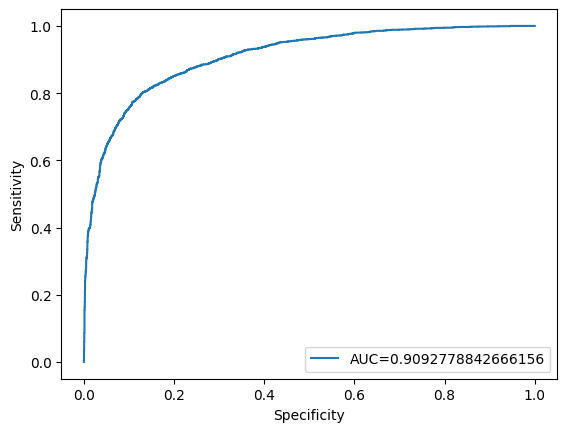

In [375]:
# Plot ROC curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [376]:
# Check the details of the model and model fit
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           health_score   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     560.9
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:17:56   Log-Likelihood:                -4832.9
No. Observations:               12078   AIC:                             9706.
Df Residuals:                   12058   BIC:                             9854.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4333      0.003    131.412      0.0

AUC of 0.91 is good accuracy in clinical practice. The number of variables is 22 including dummies. The next step would be
1. to check if outliers in some variables influence the results.
2. to check if we could remove more variables (such as by using forward/backward selection or regularization regression, ie, by Lasso or Rigdge) so the health status can be even more easily predicted. When we look at the p-values of the included variables, many of them were not significant (p>0.05), so it is likely true that not all the variables are needed to predict the the health status. Moreover, the multicolinearity issue needs to be further checked as well, which I did not expect.

A shortcoming of this logistic regression is that it requies normalization of the data points. As the mean and variance is dependent on the population of the training dataset, it is sensitive to the selection of the population. When we want to screen the health status of this individual, the data points of this individual needs first to be normalize. Next, we will see if we could use beta regression.

In [377]:
# Reduce variables in the model

X_subset = X.iloc[:,[1, 2, 11] + list(range(13, 21))]

In [378]:
X_subset.shape

(17255, 11)

In [379]:
# Split the dataset into training and test datasets
X_scale = scale(X_subset)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_bi, test_size=0.3, random_state=0)

# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [380]:
# model evaluation
y_prediction = logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_prediction)
cnf_matrix

array([[2540,  382],
       [ 561, 1694]])

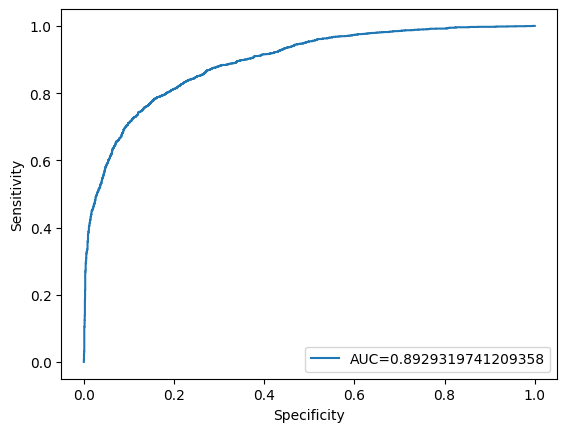

In [381]:
# Plot ROC curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [382]:
# Check the details of the model and model fit
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           health_score   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     855.9
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:17:59   Log-Likelihood:                -5174.2
No. Observations:               12078   AIC:                         1.037e+04
Df Residuals:                   12066   BIC:                         1.046e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4325      0.003    127.917      0.0

From the results, we can see the when removing insignificant variables, ROC is 0.89 which is only slightly lower than the full model, but the colinearity problem does not exist anymore. We will use this reduced X matrix to fit beta model, because beta model does not work with multicolinearity.

### Beta regression model

In [383]:
# Fit beta regression model

In [384]:
X.shape

(17255, 21)

In [385]:
y_beta.describe()

count    17255.000000
mean         0.609196
std          0.221446
min          0.150000
25%          0.420000
50%          0.650000
75%          0.820000
max          0.880000
Name: health_score, dtype: float64

In [386]:
# Add constant as constant is not included by default
X_fit = sm.add_constant(X_subset)
X_train, X_test, y_train, y_test = train_test_split(X_fit, y_beta, test_size=0.3, random_state=0)
beta_model = BetaModel(y_train, X_train).fit()

In [387]:
print(beta_model.summary())

                              BetaModel Results                               
Dep. Variable:           health_score   Log-Likelihood:                 7603.4
Model:                      BetaModel   AIC:                        -1.518e+04
Method:            Maximum Likelihood   BIC:                        -1.508e+04
Date:                Mon, 02 Oct 2023                                         
Time:                        14:18:06                                         
No. Observations:               12078                                         
Df Residuals:                   12065                                         
Df Model:                          11                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     12.4141      0.324     38.326    

In [388]:
X_train.iloc[:,1:]

,pulse_regular_or_irregular,race_ethnicity_1.0,total_calcium_mgdl,phosphorus_mgdl,total_protein_gdl,weight_kg,standing_height_cm,log_blood_urea_nitrogen_mgdl,log_glucose_serum_mgdl,log_creatinine_mgdl,log_mil_maximum_inflation_levels_mm_hg
20882,1.0,0,9.8,4.6,7.2,62.7,156.7,2.484907,4.418841,-0.223144,5.010635
3609,1.0,0,8.8,3.3,6.6,98.7,168.6,2.639057,4.564348,-0.510826,5.010635
30434,1.0,0,10.2,3.6,7.7,87.5,180.9,2.484907,4.553877,0.262364,5.010635
32031,1.0,0,9.3,4.1,7.2,171.6,184.9,2.397895,4.553877,-0.223144,4.867534
31798,1.0,0,9.0,3.7,6.7,65.4,163.7,3.091042,4.418841,0.000000,5.010635
...,...,...,...,...,...,...,...,...,...,...,...
26301,1.0,1,9.7,4.3,7.1,74.6,172.0,2.772589,4.110874,-0.105361,5.010635
32942,1.0,0,10.4,4.1,7.9,52.7,147.6,2.397895,4.897840,-0.356675,4.867534
27366,1.0,0,9.6,3.8,6.9,83.4,184.6,2.708050,4.454347,0.000000,5.075174
29008,1.0,0,9.4,4.4,6.5,71.7,146.7,2.995732,4.488636,-0.223144,5.135798


In [389]:
beta_model_2 = BetaModel(y_train, X_train, exog_precision = X_train.iloc[:,1:], slink = 'log').fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['slink']
  warnings.warn(msg, ValueWarning)


In [390]:
print(beta_model_2.summary())

                              BetaModel Results                               
Dep. Variable:           health_score   Log-Likelihood:                 7727.0
Model:                      BetaModel   AIC:                        -1.541e+04
Method:            Maximum Likelihood   BIC:                        -1.524e+04
Date:                Mon, 02 Oct 2023                                         
Time:                        14:18:10                                         
No. Observations:               12078                                         
Df Residuals:                   12055                                         
Df Model:                          21                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               12.

Model 1 and 2 behave similarly, model 2 is slightly better

In [391]:
X_train.shape

(12078, 12)

In [392]:
X_test.shape

(5177, 12)

In [394]:
y_prediction = beta_model_2.predict(X_test)


In [395]:
# Evaluation of model prediction
y_prediction = beta_model_2.predict(X_test)
score = r2_score(y_test, y_prediction)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

score = mean_absolute_error(y_test, y_prediction)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

score = np.sqrt(mean_absolute_error(y_test, y_prediction))
print("The root Mean Absolute Error of our Model is {}".format(round(score, 2)))

The accuracy of our model is 57.99999999999999%
The Mean Absolute Error of our Model is 0.11
The root Mean Absolute Error of our Model is 0.34


It seems that this beta regression performed less well than the simple linear regression model.

Since this is no better than linear regression, the next step would be to check if there are ways of increasing the fit of this beta regression model. Otherwise, we should explore other methods. Potential ordinary regression model could also work.